In [31]:
import pandas as pd
import numpy as np

from pandas import Series,DataFrame
import seaborn as sns
sns.set_style('whitegrid')

# http通信を行うためのモジュール
import requests
from io import StringIO

%matplotlib inline

In [32]:
# データのURLです。
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# requestsをつかってデータをtextとして取得
source = requests.get(url).text

# StringIOを使ってpandasのエラ-ハンドル
poll_data = StringIO(source) 

poll_df = pd.read_csv(poll_data)

In [33]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [39]:
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1


In [34]:
poll_df[['Pollster','Partisan','Affiliation']].sort_values('Pollster').drop_duplicates()

,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
...,...,...,...
105,United Technologies/National Journal,Nonpartisan,None
62,Washington Times/JZ Analytics,Nonpartisan,None
18,YouGov,Nonpartisan,None
533,YouGov/Economist,Nonpartisan,None


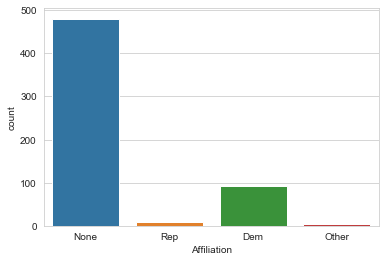

In [35]:
sns.countplot('Affiliation',data=poll_df)

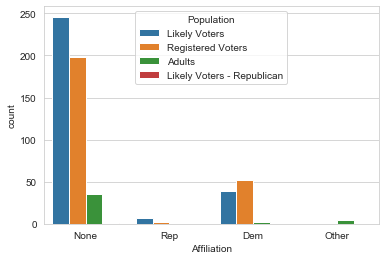

In [36]:
sns.countplot('Affiliation',data=poll_df,hue='Population')

In [37]:
avg = pd.DataFrame(poll_df.mean())

In [38]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000
